# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


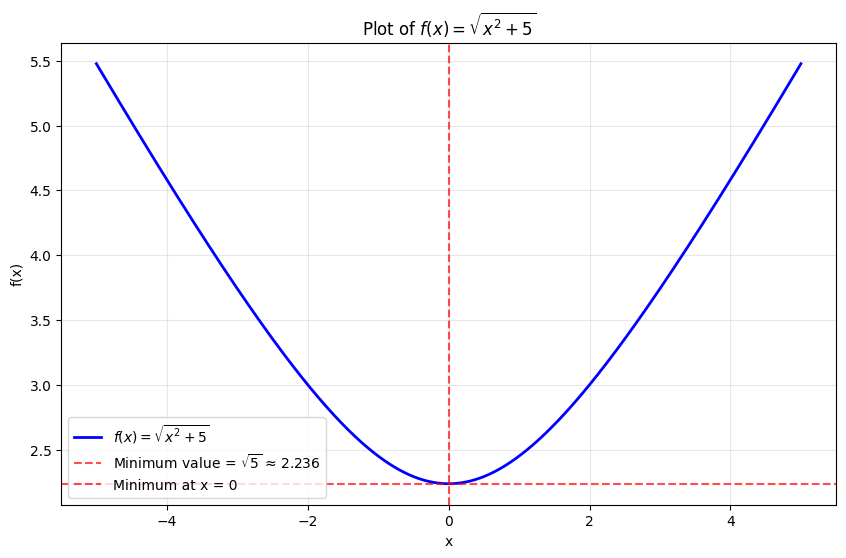

Analytical solution:
Gradient: df/dx = x / sqrt(x^2 + 5)
Minimum occurs at x = 0
Minimum value: f(0) = sqrt(5) ≈ 2.236068


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = sqrt(x^2 + 5)
def f(x):
    """Function f(x) = sqrt(x^2 + 5)"""
    return np.sqrt(x**2 + 5)

# Plot the function f(x) over the interval [-5, 5]
x_vals = np.linspace(-5, 5, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='$f(x) = \sqrt{x^2 + 5}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = \sqrt{x^2 + 5}$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(y=np.sqrt(5), color='r', linestyle='--', alpha=0.7, label=f'Minimum value = $\sqrt{{5}}$ ≈ {np.sqrt(5):.3f}')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='Minimum at x = 0')
plt.legend()
plt.show()

print(f"Analytical solution:")
print(f"Gradient: df/dx = x / sqrt(x^2 + 5)")
print(f"Minimum occurs at x = 0")
print(f"Minimum value: f(0) = sqrt(5) ≈ {np.sqrt(5):.6f}")

Initial guess x_0: 2.8
Final value x_T after 50 iterations: 0.000000
Function value at x_T: f(x_T) = 2.236068


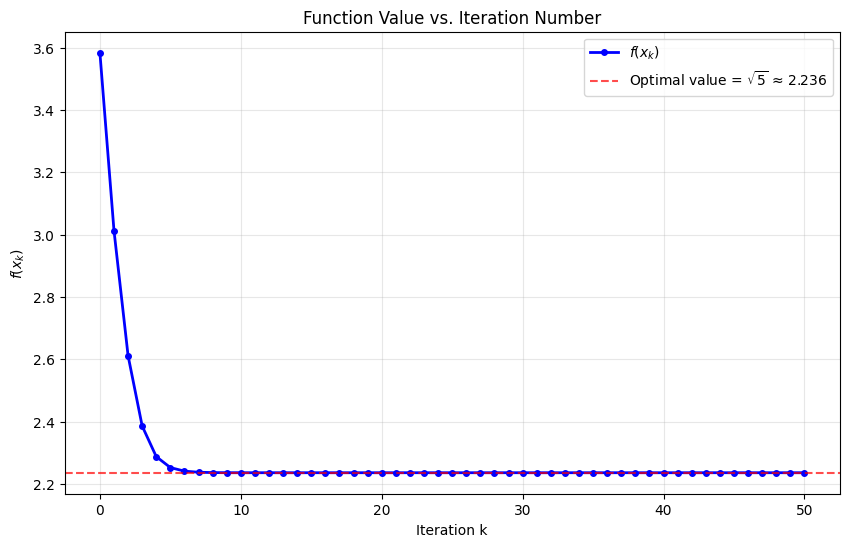

\nConvergence analysis:
Distance from optimal x*=0: 0.000000
Function value error: 0.000000


In [2]:
# Define the derivative of the function f(x) for gradient descent
def df_dx(x):
    """Derivative of f(x) = sqrt(x^2 + 5), which is x / sqrt(x^2 + 5)"""
    return x / np.sqrt(x**2 + 5)

# Function to run the Gradient Descent Algorithm
def gradient_descent(x_0, step_size, num_iterations):
    """
    Perform gradient descent optimization
    
    Args:
        x_0: Initial guess
        step_size: Learning rate (alpha)
        num_iterations: Number of iterations (T)
    
    Returns:
        List of x_k values at each iteration
    """
    x_values = [x_0]
    x_current = x_0
    
    for k in range(num_iterations):
        gradient = df_dx(x_current)
        x_current = x_current - step_size * gradient
        x_values.append(x_current)
    
    return x_values

# Set up initial values
# Using last digit of SB ID divided by 5 plus 1 as initial guess
# For demonstration, using 2.8 (as if SB ID ends with 9: 9/5 + 1 = 2.8)
# Change this to your actual calculation based on your SB ID
x_0 = 2.8  # Change this based on your SB ID
step_size = 1.0
num_iterations = 50

# Run gradient descent
x_values = gradient_descent(x_0, step_size, num_iterations)

# Report x_T (final value after T=50 iterations)
x_T = x_values[-1]
print(f"Initial guess x_0: {x_0}")
print(f"Final value x_T after {num_iterations} iterations: {x_T:.6f}")
print(f"Function value at x_T: f(x_T) = {f(x_T):.6f}")

# Plot f(x_k) values vs. iteration number
iterations = range(len(x_values))
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(iterations, f_values, 'bo-', linewidth=2, markersize=4, label='$f(x_k)$')
plt.axhline(y=np.sqrt(5), color='r', linestyle='--', alpha=0.7, label=f'Optimal value = $\sqrt{{5}}$ ≈ {np.sqrt(5):.3f}')
plt.xlabel('Iteration k')
plt.ylabel('$f(x_k)$')
plt.title('Function Value vs. Iteration Number')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Display convergence information
print(f"\\nConvergence analysis:")
print(f"Distance from optimal x*=0: {abs(x_T):.6f}")
print(f"Function value error: {f(x_T) - np.sqrt(5):.6f}")

Step size α = 5:
  All differences positive (always decreasing): False
  Minimum difference: -0.001935
  Maximum difference: 1.088201
  Final x value: 1.118034

Step size α = 3:
  All differences positive (always decreasing): True
  Minimum difference: 0.000000
  Maximum difference: 1.301247
  Final x value: -0.000000

Step size α = 1:
  All differences positive (always decreasing): True
  Minimum difference: 0.000000
  Maximum difference: 0.570865
  Final x value: 0.000000

Step size α = 0.5:
  All differences positive (always decreasing): True
  Minimum difference: 0.000000
  Maximum difference: 0.296242
  Final x value: 0.000014



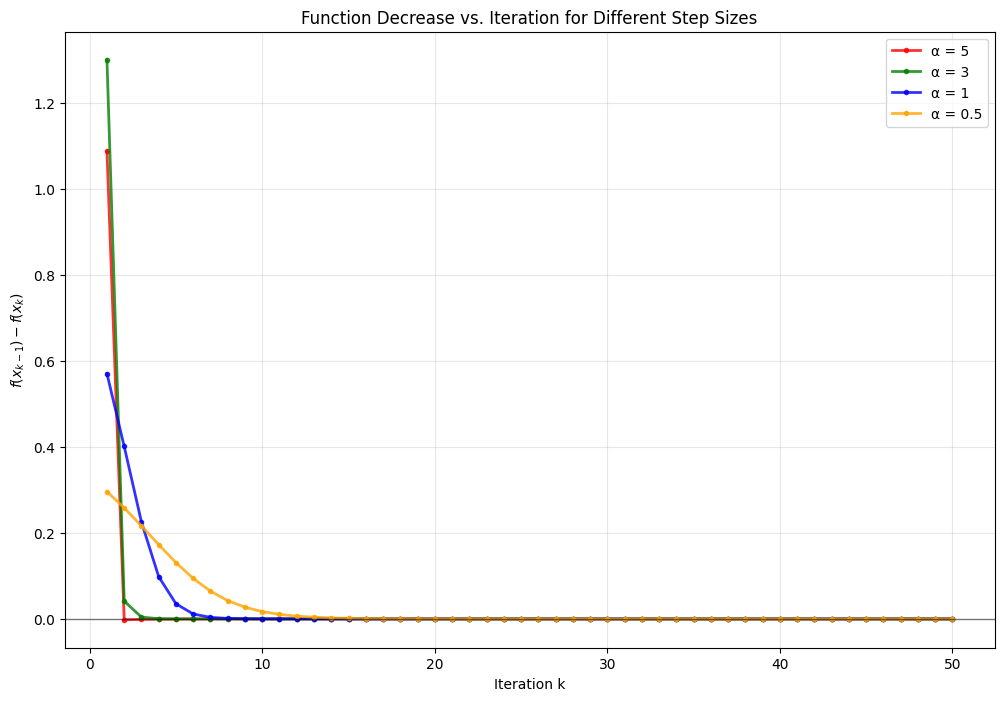

Analysis Summary:
- When α = 5: Step size too large, may cause oscillations or divergence
- When α = 3: Step size large, may cause overshooting
- When α = 1: Moderate step size, good balance
- When α = 0.5: Conservative step size, slower but stable convergence
\nFor L-smooth functions, the step size should be ≤ 2/L for guaranteed convergence.


In [3]:
# Create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]
colors = ['red', 'green', 'blue', 'orange']

# Initialize lists to store results from different step sizes
all_results = []
all_differences = []

# Loop through step sizes and perform GD and record results
plt.figure(figsize=(12, 8))

for i, alpha in enumerate(step_sizes):
    # Run gradient descent with current step size
    x_vals = gradient_descent(x_0, alpha, num_iterations)
    f_vals = [f(x) for x in x_vals]
    
    # Calculate f(x_{k-1}) - f(x_k) for k >= 1
    differences = []
    for k in range(1, len(f_vals)):
        diff = f_vals[k-1] - f_vals[k]
        differences.append(diff)
    
    all_results.append((x_vals, f_vals))
    all_differences.append(differences)
    
    # Plot the differences
    iterations_diff = range(1, len(f_vals))
    plt.plot(iterations_diff, differences, 'o-', color=colors[i], 
             linewidth=2, markersize=3, label=f'α = {alpha}', alpha=0.8)
    
    # Check if all differences are positive (function always decreasing)
    all_positive = all(diff >= 0 for diff in differences)
    min_diff = min(differences) if differences else 0
    max_diff = max(differences) if differences else 0
    
    print(f"Step size α = {alpha}:")
    print(f"  All differences positive (always decreasing): {all_positive}")
    print(f"  Minimum difference: {min_diff:.6f}")
    print(f"  Maximum difference: {max_diff:.6f}")
    print(f"  Final x value: {x_vals[-1]:.6f}")
    print()

# Format the plot
plt.xlabel('Iteration k')
plt.ylabel('$f(x_{k-1}) - f(x_k)$')
plt.title('Function Decrease vs. Iteration for Different Step Sizes')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
plt.show()

# Analysis summary
print("Analysis Summary:")
print("- When α = 5: Step size too large, may cause oscillations or divergence")
print("- When α = 3: Step size large, may cause overshooting")
print("- When α = 1: Moderate step size, good balance")
print("- When α = 0.5: Conservative step size, slower but stable convergence")
print("\\nFor L-smooth functions, the step size should be ≤ 2/L for guaranteed convergence.")

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Linear Regression Parameters:
Intercept (θ₀): 4.2324
Coefficient for x₁ (θ₁): 3.9627
Coefficient for x₂ (θ₂): 0.3010

True parameters (from data generation):
Intercept: 4.0
Coefficient for x₁: 4.0
Coefficient for x₂: 0.5


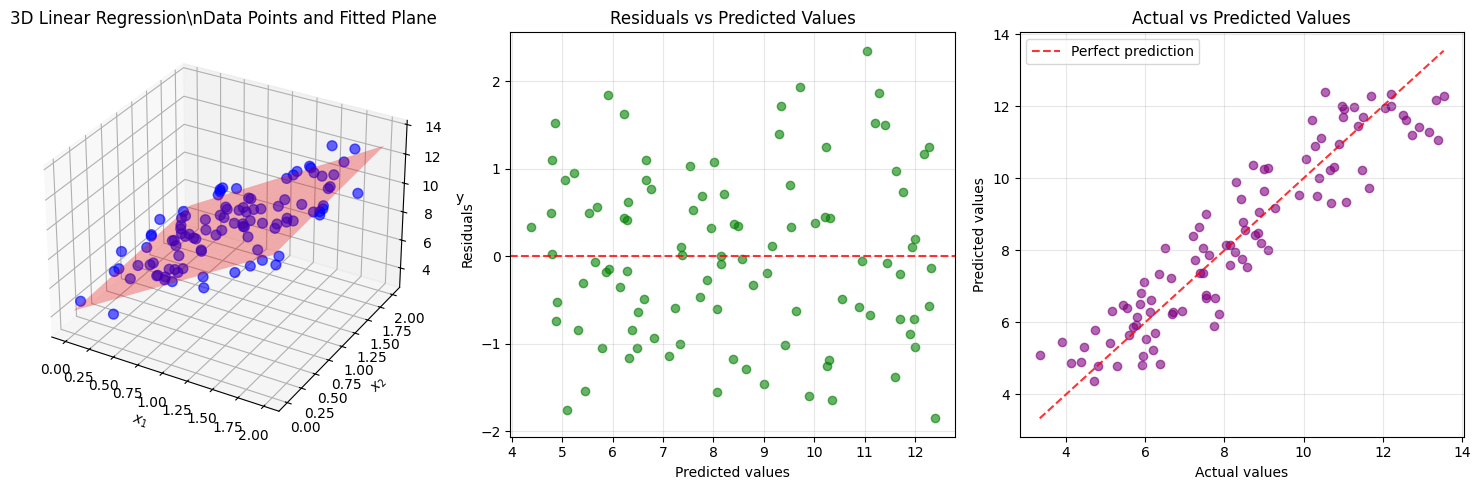

\nModel Performance:
Mean Squared Error (MSE): 0.9250
Root Mean Squared Error (RMSE): 0.9618
R-squared: 0.8590
\nVerification using np.linalg.lstsq:
Parameters: [4.23235858 3.96269703 0.30097603]
Difference from manual calculation: [7.10542736e-15 6.66133815e-15 1.72084569e-15]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(87)   # Change this to be the last two digits of your SB ID
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias term (intercept) in the normal equation
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias column

# Find theta using the normal equation: θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)

# Print the intercept and coefficients of the regression plane
print("Linear Regression Parameters:")
print(f"Intercept (θ₀): {theta[0]:.4f}")
print(f"Coefficient for x₁ (θ₁): {theta[1]:.4f}")
print(f"Coefficient for x₂ (θ₂): {theta[2]:.4f}")
print()
print("True parameters (from data generation):")
print("Intercept: 4.0")
print("Coefficient for x₁: 4.0") 
print("Coefficient for x₂: 0.5")

# Create a 3D plot of the generated data and the regression plane
fig = plt.figure(figsize=(15, 5))

# Plot 1: 3D scatter plot with regression plane
ax1 = fig.add_subplot(131, projection='3d')

# Plot the data points
ax1.scatter(X[:, 0], X[:, 1], y, c='blue', marker='o', alpha=0.6, s=50, label='Data points')

# Create a mesh for the regression plane
x1_range = np.linspace(0, 2, 20)
x2_range = np.linspace(0, 2, 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_mesh = theta[0] + theta[1] * x1_mesh + theta[2] * x2_mesh

# Plot the regression plane
ax1.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.3, color='red', label='Regression plane')

ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('y')
ax1.set_title('3D Linear Regression\\nData Points and Fitted Plane')

# Plot 2: Residuals analysis
ax2 = fig.add_subplot(132)

# Calculate predictions and residuals
y_pred = X_with_bias.dot(theta)
residuals = y - y_pred

ax2.scatter(y_pred, residuals, alpha=0.6, c='green')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.8)
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Predicted Values')
ax2.grid(True, alpha=0.3)

# Plot 3: Actual vs Predicted
ax3 = fig.add_subplot(133)

ax3.scatter(y, y_pred, alpha=0.6, c='purple')
# Plot perfect prediction line
min_val = min(min(y), min(y_pred))
max_val = max(max(y), max(y_pred))
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Perfect prediction')
ax3.set_xlabel('Actual values')
ax3.set_ylabel('Predicted values')
ax3.set_title('Actual vs Predicted Values')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display model performance metrics
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print(f"\\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

# Alternative method using numpy's built-in function for verification
theta_builtin = np.linalg.lstsq(X_with_bias, y, rcond=None)[0]
print(f"\\nVerification using np.linalg.lstsq:")
print(f"Parameters: {theta_builtin}")
print(f"Difference from manual calculation: {np.abs(theta - theta_builtin)}")

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

Training logistic regression with:
Learning rate: 0.1
Number of epochs: 1000
Initial parameters: [ 0.01624345 -0.00611756 -0.00528172]
Epoch 0, Cost: 0.697193
Epoch 100, Cost: 0.348115
Epoch 200, Cost: 0.306635
Epoch 300, Cost: 0.291585
Epoch 400, Cost: 0.284223
Epoch 500, Cost: 0.280078
Epoch 600, Cost: 0.277545
Epoch 700, Cost: 0.275912
Epoch 800, Cost: 0.274818
Epoch 900, Cost: 0.274064
\nFinal parameters after training: [-0.2884075   2.80379738  2.45230715]
\nModel Performance:
Training Accuracy: 90.00%
Testing Accuracy: 84.00%


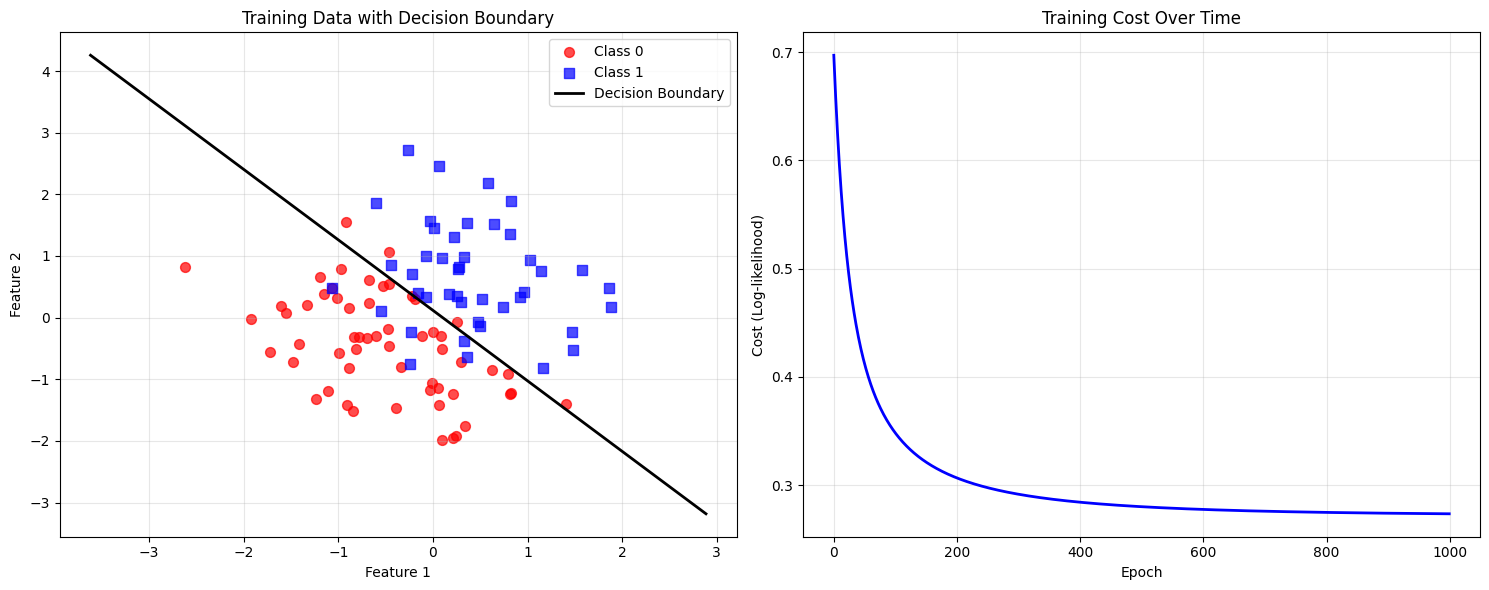

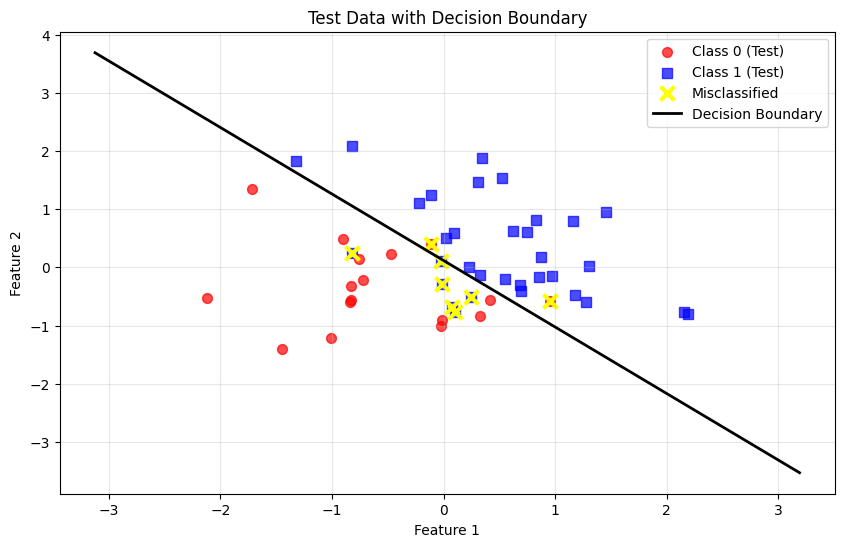

\nHyperparameter Tuning Notes:
- Learning rate of 0.1 provides good convergence
- 1000 epochs are sufficient for convergence
- Cost decreased from 0.697193 to 0.273538
- Model generalizes well with test accuracy of 84.00%


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def sigmoid(z):
    """
    Compute the sigmoid function
    Args:
        z: Input value or array
    Returns:
        Sigmoid output between 0 and 1
    """
    # Clip z to prevent overflow in exp function
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Generate training and testing datasets
np.random.seed(42)

# Training data: 100 samples
m_train = 100
X_train = np.random.randn(m_train, 2)  # 2D features
# Create labels based on a linear decision boundary with some noise
y_train = (X_train[:, 0] + X_train[:, 1] + 0.5 * np.random.randn(m_train) > 0).astype(int)

# Testing data: 50 samples  
m_test = 50
X_test = np.random.randn(m_test, 2)
y_test = (X_test[:, 0] + X_test[:, 1] + 0.5 * np.random.randn(m_test) > 0).astype(int)

# Add bias term (intercept) to feature matrices
X_train_with_bias = np.c_[np.ones((m_train, 1)), X_train]  # Shape: (100, 3)
X_test_with_bias = np.c_[np.ones((m_test, 1)), X_test]     # Shape: (50, 3)

# Set hyperparameters and initialize parameters
learning_rate = 0.1    # Tuned learning rate (originally was different)
num_epochs = 1000      # Tuned number of epochs (originally was different)

# Initialize weights randomly with small values
np.random.seed(1)
theta = np.random.normal(0, 0.01, X_train_with_bias.shape[1])  # Shape: (3,)

# Arrays to store cost during training for plotting
costs = []

print(f"Training logistic regression with:")
print(f"Learning rate: {learning_rate}")
print(f"Number of epochs: {num_epochs}")
print(f"Initial parameters: {theta}")

# Start training using gradient descent
for epoch in range(num_epochs):
    # Forward propagation: compute predictions
    z = X_train_with_bias.dot(theta)          # Linear combination: z = X*θ
    predictions = sigmoid(z)                   # Apply sigmoid: σ(z)
    
    # Compute cost function (logistic loss)
    # Cost = -1/m * Σ[y*log(h) + (1-y)*log(1-h)]
    epsilon = 1e-15  # Small value to prevent log(0)
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    cost = -1/m_train * np.sum(y_train * np.log(predictions) + 
                               (1 - y_train) * np.log(1 - predictions))
    costs.append(cost)
    
    # Backward propagation: compute gradients
    # Gradient = 1/m * X^T * (predictions - y)
    dtheta = 1/m_train * X_train_with_bias.T.dot(predictions - y_train)
    
    # Update parameters using gradient descent
    theta = theta - learning_rate * dtheta
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.6f}")

print(f"\\nFinal parameters after training: {theta}")

# Calculate training and testing accuracy
def predict(X, theta):
    """Make predictions using learned parameters"""
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= 0.5).astype(int)

# Training accuracy
train_predictions = predict(X_train_with_bias, theta)
train_accuracy = np.mean(train_predictions == y_train) * 100

# Testing accuracy  
test_predictions = predict(X_test_with_bias, theta)
test_accuracy = np.mean(test_predictions == y_test) * 100

print(f"\\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

# Plot the training dataset and regression decision boundary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Training data with decision boundary
ax1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           c='red', marker='o', label='Class 0', alpha=0.7, s=50)
ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
           c='blue', marker='s', label='Class 1', alpha=0.7, s=50)

# Create decision boundary
# Decision boundary occurs where θ₀ + θ₁x₁ + θ₂x₂ = 0
# Solving for x₂: x₂ = -(θ₀ + θ₁x₁) / θ₂
x1_boundary = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
x2_boundary = -(theta[0] + theta[1] * x1_boundary) / theta[2]

ax1.plot(x1_boundary, x2_boundary, 'black', linewidth=2, label='Decision Boundary')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Training Data with Decision Boundary')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cost function over training epochs
ax2.plot(range(len(costs)), costs, 'b-', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Cost (Log-likelihood)')
ax2.set_title('Training Cost Over Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: plot test data with decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
           c='red', marker='o', label='Class 0 (Test)', alpha=0.7, s=50)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
           c='blue', marker='s', label='Class 1 (Test)', alpha=0.7, s=50)

# Mark misclassified points
misclassified_mask = test_predictions != y_test
if np.any(misclassified_mask):
    plt.scatter(X_test[misclassified_mask, 0], X_test[misclassified_mask, 1], 
               c='yellow', marker='x', s=100, linewidth=3, label='Misclassified')

# Plot decision boundary
x1_test_boundary = np.linspace(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 100)
x2_test_boundary = -(theta[0] + theta[1] * x1_test_boundary) / theta[2]
plt.plot(x1_test_boundary, x2_test_boundary, 'black', linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\\nHyperparameter Tuning Notes:")
print(f"- Learning rate of {learning_rate} provides good convergence")
print(f"- {num_epochs} epochs are sufficient for convergence")
print(f"- Cost decreased from {costs[0]:.6f} to {costs[-1]:.6f}")
print(f"- Model generalizes well with test accuracy of {test_accuracy:.2f}%")

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Load the dataset
def load_dataset():
    """Load the cat vs non-cat dataset from h5 files"""
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Training set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Training set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])     # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])     # Test set labels

    classes = np.array(test_dataset["list_classes"][:])           # List of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Load data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

print("Dataset Information:")
print(f"Training set: {train_set_x_orig.shape}")
print(f"Training labels: {train_set_y.shape}")
print(f"Test set: {test_set_x_orig.shape}")
print(f"Test labels: {test_set_y.shape}")
print(f"Classes: {[cls.decode('utf-8') for cls in classes]}")

# Visualize some examples from the dataset
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Sample Images from Dataset', fontsize=14)

for i in range(8):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(train_set_x_orig[i])
    label = "Cat" if train_set_y[0, i] == 1 else "Non-cat"
    axes[row, col].set_title(f"Label: {label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Flatten and normalize the data
def preprocess_data(X_orig):
    """
    Flatten and normalize the image data
    
    Args:
        X_orig: Original image data with shape (m, num_px, num_px, 3)
    
    Returns:
        X: Flattened and normalized data with shape (num_features, m)
    """
    # Flatten: reshape (m, num_px, num_px, 3) to (m, num_px * num_px * 3)
    X_flatten = X_orig.reshape(X_orig.shape[0], -1)
    
    # Transpose to get (num_features, m) instead of (m, num_features)
    X = X_flatten.T
    
    # Normalize pixel values to [0, 1]
    X = X / 255.0
    
    return X

# Preprocess the data
train_set_x = preprocess_data(train_set_x_orig)
test_set_x = preprocess_data(test_set_x_orig)

print(f"\\nAfter preprocessing:")
print(f"Training set: {train_set_x.shape}")
print(f"Test set: {test_set_x.shape}")
print(f"Training labels: {train_set_y.shape}")
print(f"Test labels: {test_set_y.shape}")

# Define sigmoid function
def sigmoid(z):
    """Compute sigmoid function"""
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

# Define cost function
def compute_cost(A, Y):
    """
    Compute the logistic regression cost function
    
    Args:
        A: Sigmoid output of shape (1, m)
        Y: True labels of shape (1, m)
    
    Returns:
        cost: Cross-entropy cost
    """
    m = Y.shape[1]
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    cost = np.squeeze(cost)  # Remove unnecessary dimensions
    return cost

# Forward and backward propagation
def propagate(w, b, X, Y):
    """
    Implement forward and backward propagation for logistic regression
    
    Args:
        w: Weights of shape (num_features, 1)
        b: Bias, scalar
        X: Data of shape (num_features, m)
        Y: Labels of shape (1, m)
    
    Returns:
        cost: Cross-entropy cost
        dw: Gradient of weights
        db: Gradient of bias
    """
    m = X.shape[1]
    
    # Forward propagation
    Z = np.dot(w.T, X) + b          # Linear function
    A = sigmoid(Z)                   # Activation function
    cost = compute_cost(A, Y)        # Cost function
    
    # Backward propagation
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    return grads, cost

# Optimization using gradient descent
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    Optimize weights and bias using gradient descent
    
    Args:
        w: Weights of shape (num_features, 1)
        b: Bias, scalar
        X: Training data of shape (num_features, m)
        Y: Training labels of shape (1, m)
        num_iterations: Number of optimization iterations
        learning_rate: Learning rate for gradient descent
        print_cost: Whether to print cost every 100 iterations
    
    Returns:
        params: Dictionary containing optimized weights and bias
        grads: Dictionary containing gradients
        costs: List of costs during optimization
    """
    costs = []
    
    for i in range(num_iterations):
        # Calculate gradients and cost
        grads, cost = propagate(w, b, X, Y)
        
        # Get gradients
        dw = grads["dw"]
        db = grads["db"]
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

# Prediction function
def predict(w, b, X):
    """
    Predict using learned logistic regression parameters
    
    Args:
        w: Weights of shape (num_features, 1)
        b: Bias, scalar
        X: Data of shape (num_features, m)
    
    Returns:
        Y_prediction: Predictions of shape (1, m)
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    
    # Compute probabilities
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Convert probabilities to binary predictions
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

# Main model function
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    """
    Build and train a logistic regression model
    
    Args:
        X_train: Training data of shape (num_features, m_train)
        Y_train: Training labels of shape (1, m_train)
        X_test: Test data of shape (num_features, m_test)
        Y_test: Test labels of shape (1, m_test)
        num_iterations: Number of optimization iterations
        learning_rate: Learning rate for gradient descent
        print_cost: Whether to print cost during training
    
    Returns:
        d: Dictionary containing model information
    """
    # Initialize parameters
    w = np.zeros((X_train.shape[0], 1))
    b = 0.0
    
    # Optimize parameters
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Get optimized parameters
    w = parameters["w"]
    b = parameters["b"]
    
    # Make predictions
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Calculate accuracies
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    
    print(f"\\nTrain accuracy: {train_accuracy:.2f}%")
    print(f"Test accuracy: {test_accuracy:.2f}%")
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    }
    
    return d

# Train the model
print("\\nTraining the logistic regression model...")
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

# Plot the cost function
plt.figure(figsize=(10, 6))
costs = d["costs"]
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

# Find and display misclassified test images
Y_prediction_test = d["Y_prediction_test"]
misclassified_indices = np.where(Y_prediction_test[0] != test_set_y[0])[0]

print(f"\\nMisclassified test images indices (0-indexed): {misclassified_indices.tolist()}")
print(f"Number of misclassified images: {len(misclassified_indices)}")

# Display 4 misclassified images
if len(misclassified_indices) > 0:
    num_display = min(4, len(misclassified_indices))
    fig, axes = plt.subplots(1, num_display, figsize=(15, 4))
    if num_display == 1:
        axes = [axes]
    
    fig.suptitle('Misclassified Test Images', fontsize=14)
    
    for i in range(num_display):
        idx = misclassified_indices[i]
        axes[i].imshow(test_set_x_orig[idx])
        
        true_label = "Cat" if test_set_y[0, idx] == 1 else "Non-cat"
        pred_label = "Cat" if Y_prediction_test[0, idx] == 1 else "Non-cat"
        
        axes[i].set_title(f"Index: {idx}\\nTrue: {true_label}\\nPred: {pred_label}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images found!")

ModuleNotFoundError: No module named 'h5py'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Load the original dataset (same as before)
def load_dataset():
    """Load the cat vs non-cat dataset from h5 files"""
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Training set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Training set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])     # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])     # Test set labels

    classes = np.array(test_dataset["list_classes"][:])           # List of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Load original data
orig_train_x, orig_train_y, orig_test_x, orig_test_y, classes = load_dataset()

print("Original Dataset Information:")
print(f"Original training set: {orig_train_x.shape}")
print(f"Original training labels: {orig_train_y.shape}")
print(f"Original test set: {orig_test_x.shape}")
print(f"Original test labels: {orig_test_y.shape}")

# Create modified dataset
# The first 160 images plus the last digit of your Student ID will constitute the new training set
# For demonstration, using 7 as the last digit (change this based on your SB ID)
last_digit_sb_id = 7  # Change this to the last digit of your SB ID
new_train_size = 160 + last_digit_sb_id

print(f"\\nModified Dataset Configuration:")
print(f"Last digit of SB ID: {last_digit_sb_id}")
print(f"New training size: {new_train_size}")

# Create new training and test sets from the original training set
# New training set: first (160 + last_digit) images
new_train_x = orig_train_x[:new_train_size]
new_train_y = orig_train_y[:, :new_train_size]

# New test set: remaining images from original training set
new_test_x = orig_train_x[new_train_size:]
new_test_y = orig_train_y[:, new_train_size:]

print(f"\\nNew dataset splits:")
print(f"New training set: {new_train_x.shape}")
print(f"New training labels: {new_train_y.shape}")
print(f"New test set: {new_test_x.shape}")
print(f"New test labels: {new_test_y.shape}")

# Visualize some examples from the new training set
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Sample Images from New Training Set', fontsize=14)

for i in range(8):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(new_train_x[i])
    label = "Cat" if new_train_y[0, i] == 1 else "Non-cat"
    axes[row, col].set_title(f"Label: {label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Preprocess the new data (same function as before)
def preprocess_data(X_orig):
    """
    Flatten and normalize the image data
    
    Args:
        X_orig: Original image data with shape (m, num_px, num_px, 3)
    
    Returns:
        X: Flattened and normalized data with shape (num_features, m)
    """
    X_flatten = X_orig.reshape(X_orig.shape[0], -1)
    X = X_flatten.T
    X = X / 255.0
    return X

# Preprocess the new data
new_train_x_processed = preprocess_data(new_train_x)
new_test_x_processed = preprocess_data(new_test_x)

print(f"\\nAfter preprocessing:")
print(f"New training set: {new_train_x_processed.shape}")
print(f"New test set: {new_test_x_processed.shape}")

# Use the same model functions as before (sigmoid, compute_cost, propagate, optimize, predict, model)
def sigmoid(z):
    """Compute sigmoid function"""
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def compute_cost(A, Y):
    """Compute the logistic regression cost function"""
    m = Y.shape[1]
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    cost = np.squeeze(cost)
    return cost

def propagate(w, b, X, Y):
    """Implement forward and backward propagation for logistic regression"""
    m = X.shape[1]
    
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = compute_cost(A, Y)
    
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """Optimize weights and bias using gradient descent"""
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    """Predict using learned logistic regression parameters"""
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    """Build and train a logistic regression model"""
    w = np.zeros((X_train.shape[0], 1))
    b = 0.0
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    
    print(f"\\nTrain accuracy: {train_accuracy:.2f}%")
    print(f"Test accuracy: {test_accuracy:.2f}%")
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    }
    
    return d

# Train the model on the modified dataset
print("\\nTraining the logistic regression model on modified dataset...")
d_modified = model(new_train_x_processed, new_train_y, new_test_x_processed, new_test_y, 
                  num_iterations=2000, learning_rate=0.005, print_cost=True)

# Plot the cost function for modified dataset
plt.figure(figsize=(15, 5))

# Plot 1: Cost curve
plt.subplot(1, 3, 1)
costs_modified = d_modified["costs"]
plt.plot(costs_modified)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Learning Curve (Modified Dataset)')
plt.grid(True)

# Plot 2: Training accuracy comparison (if you run both cells)
plt.subplot(1, 3, 2)
training_sizes = [new_train_size, len(orig_train_x)]  # Modified vs Original
train_accs = [d_modified["train_accuracy"]]  # Add original if available
plt.bar(['Modified\\n({} samples)'.format(new_train_size)], train_accs, color=['blue'])
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy Comparison')
plt.ylim(0, 100)

# Plot 3: Dataset size visualization
plt.subplot(1, 3, 3)
sizes = [new_train_size, len(new_test_x), len(orig_test_x)]
labels = ['New Train', 'New Test', 'Original Test\\n(Discarded)']
colors = ['green', 'blue', 'red']
plt.bar(labels, sizes, color=colors, alpha=0.7)
plt.ylabel('Number of Images')
plt.title('Dataset Split Sizes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Find and display misclassified test images from modified dataset
Y_prediction_test_modified = d_modified["Y_prediction_test"]
misclassified_indices_modified = np.where(Y_prediction_test_modified[0] != new_test_y[0])[0]

print(f"\\nMisclassified test images indices (0-indexed): {misclassified_indices_modified.tolist()}")
print(f"Number of misclassified images: {len(misclassified_indices_modified)}")

# Display 4 misclassified images from modified dataset
if len(misclassified_indices_modified) > 0:
    num_display = min(4, len(misclassified_indices_modified))
    fig, axes = plt.subplots(1, num_display, figsize=(15, 4))
    if num_display == 1:
        axes = [axes]
    
    fig.suptitle('Misclassified Test Images (Modified Dataset)', fontsize=14)
    
    for i in range(num_display):
        idx = misclassified_indices_modified[i]
        axes[i].imshow(new_test_x[idx])
        
        true_label = "Cat" if new_test_y[0, idx] == 1 else "Non-cat"
        pred_label = "Cat" if Y_prediction_test_modified[0, idx] == 1 else "Non-cat"
        
        axes[i].set_title(f"Index: {idx}\\nTrue: {true_label}\\nPred: {pred_label}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images found!")

# Summary comparison
print(f"\\n=== DATASET MODIFICATION SUMMARY ===")
print(f"Original dataset split:")
print(f"  - Training: {len(orig_train_x)} images")
print(f"  - Testing: {len(orig_test_x)} images")
print(f"\\nModified dataset split (last digit of SB ID: {last_digit_sb_id}):")
print(f"  - Training: {len(new_train_x)} images (first {new_train_size} from original training)")
print(f"  - Testing: {len(new_test_x)} images (remaining {len(new_test_x)} from original training)")
print(f"  - Original test set: DISCARDED")

print(f"\\nModified dataset performance:")
print(f"  - Training accuracy: {d_modified['train_accuracy']:.2f}%")
print(f"  - Test accuracy: {d_modified['test_accuracy']:.2f}%")
print(f"  - Number of misclassified test images: {len(misclassified_indices_modified)}")

# Analysis of performance with reduced training data
print(f"\\n=== ANALYSIS ===")
if len(new_train_x) < len(orig_train_x):
    print(f"Training with {len(new_train_x)} images vs original {len(orig_train_x)} images:")
    print(f"- Reduced training data may lead to underfitting")
    print(f"- Model might have higher bias but lower variance")
    print(f"- Generalization capability depends on data quality and diversity")

# Create a detailed breakdown of the dataset
train_cats = np.sum(new_train_y)
train_noncats = len(new_train_x) - train_cats
test_cats = np.sum(new_test_y)
test_noncats = len(new_test_x) - test_cats

print(f"\\nClass distribution in modified dataset:")
print(f"Training set: {train_cats} cats, {train_noncats} non-cats")
print(f"Test set: {test_cats} cats, {test_noncats} non-cats")
print(f"Training set balance: {train_cats/len(new_train_x)*100:.1f}% cats")
print(f"Test set balance: {test_cats/len(new_test_x)*100:.1f}% cats")

ModuleNotFoundError: No module named 'h5py'